<a href="https://colab.research.google.com/github/CarlosCortes2020/CarlosCortes2020.github.io/blob/master/002_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [4]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

Lo primero que debemos hacer es leer nuestra fuente de datos.

Montamos el Drive de Google par apoder tener acceso y visualizar las fuentes de datos (Archivos).

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargar Dataframe

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Como usar Google Colab/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Cuantas filas y columnas tiene?

In [9]:
df.shape

(1000, 8)

Cuál es el tipo de datos de las columnas?

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

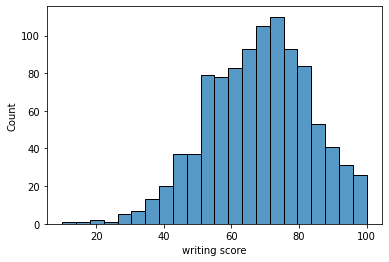

In [12]:
sns.histplot(data=df, x="writing score")



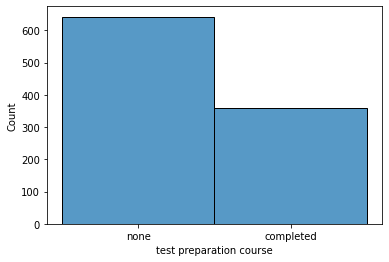

In [13]:
sns.histplot(data=df, x="test preparation course")

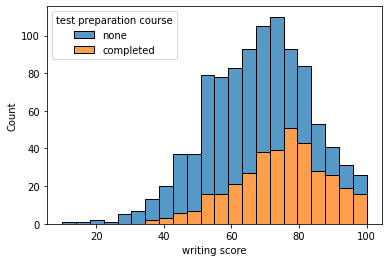

In [14]:
sns.histplot(data=df, x="writing score",hue="test preparation course",multiple="stack")

### Visualizando nuestros datos

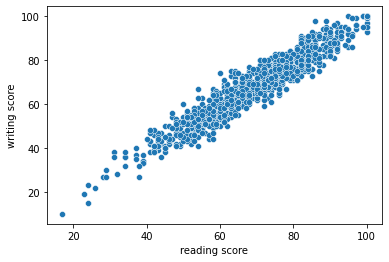

In [15]:
sns.scatterplot(data=df, x="reading score", y="writing score")


En la gráfica se puede notar que los datos estan correlacionados.

### Creando una tabla de frecuencias

In [21]:
freq = df["writing score"].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={"index":"writing score","writing score": "number of students"})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

# Iniciamos con la obtencion de los datos de estadistica descriptiva.
Obtenemos el promedio.

In [22]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [24]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

Primero definimos las variables a las cuales les haremos la prueba de hipotesis.

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [35]:
X = df["reading score"].values
Y = df["writing score"].values

X = X.reshape(-1, 1)

#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split  #Importar Scikitlearn library
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)



In [40]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #Esta variable guarda el modelo de regresion lineal

reg.fit(X_train, Y_train)  #Indica al modelo que se entrene con nuestros datos

#Imprimir parametros de ecuacion recta
print("La pendiente es: ", reg.coef_)
print("El bias es: ", reg.intercept_)


La pendiente es:  [0.9890599]
El bias es:  -0.5675782451901625


## Visualización de nuestro modelo entrenado

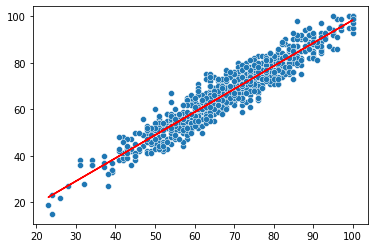

In [45]:
x_flat = X_train.flatten()

y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train, y_hat, color="r")

## Evaluación de nuestro modelo

In [47]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test) 

#Calcular el mean squared error
print(mean_squared_error(Y_test, y_pred))

21.020736269534492


In [49]:
value = pd.DataFrame({"Actual test": Y_test.flatten(), "Predict": y_pred})
value


,Actual test,Predict
0,69,69.655674
1,53,52.841656
2,100,98.338412
3,82,86.469693
4,78,75.590034
...,...,...
195,54,59.765076
196,80,81.524393
197,44,56.797896
198,45,41.961997
